## Pandas-datareader 讀真的股票資料

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
!conda install pandas-datareader -y  # 我們先來裝 pandas-datareader

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # 我們先來裝 pandas-datareader


In [7]:
import pandas_datareader as pdr

ModuleNotFoundError: No module named 'pandas_datareader'

In [8]:
df = pdr.get_data_yahoo("AAPL")  # 讀入 Apple 股價

NameError: name 'pdr' is not defined

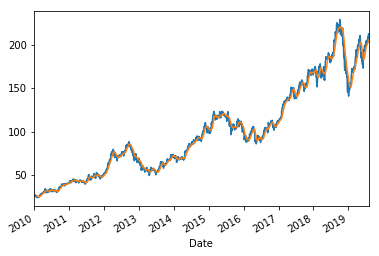

In [8]:
# 看調整收盤價和 20 天的移動平均
df["Adj Close"].plot()
df["Adj Close"].rolling(20).mean().plot()

In [9]:
# 算月 (20 天)、年 (240 天) 的移動平均
df["MA20"] = df["Adj Close"].rolling(20).mean()

In [10]:
df["MA240"] = df["Adj Close"].rolling(240).mean()

In [11]:
# 我們只取近兩年的資料來分析
dfs = df[["Adj Close", "MA20", "MA240"]][-480:]

In [12]:
dfs.columns

Index(['Adj Close', 'MA20', 'MA240'], dtype='object')

In [13]:
dfs.columns = ['Close', 'MA20', 'MA240']

In [14]:
dfs.head()

,Close,MA20,MA240
Date,,,
2017-09-06,157.657867,156.132035,130.463025
2017-09-07,157.024948,156.172446,130.667930
2017-09-08,154.464020,156.333599,130.861488
2017-09-11,157.258652,156.529321,131.065852
2017-09-12,156.635468,156.578495,131.264191


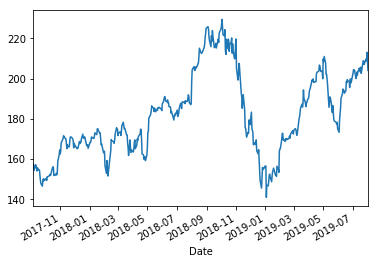

In [15]:
dfs.Close.plot()

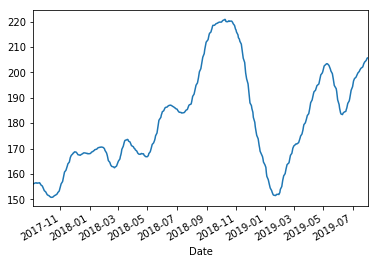

In [16]:
dfs.MA20.plot()

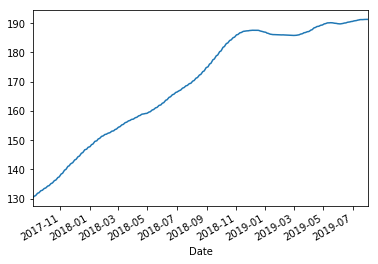

In [17]:
dfs.MA240.plot()

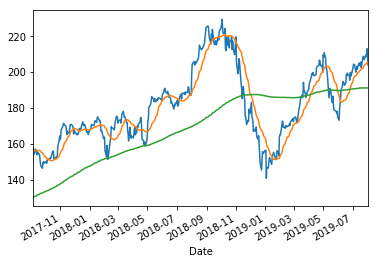

In [18]:
dfs.Close.plot()
dfs.MA20.plot()
dfs.MA240.plot()

## 分析台股

In [19]:
# 我們可以發現讀台股資料也可以, 比如說台積電
df = pdr.get_data_yahoo("2330.TW") 

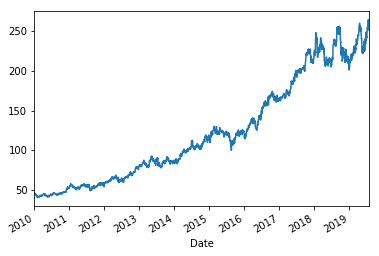

In [20]:
df["Adj Close"].plot()

In [21]:
df[df["Adj Close"].isnull()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,


In [22]:
df.dropna(inplace=True)

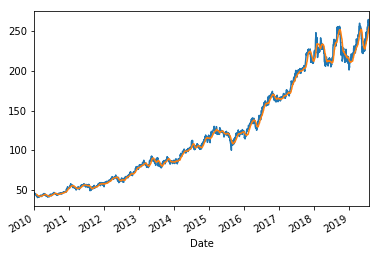

In [25]:
df["Adj Close"].plot()
df["Adj Close"].rolling(20).mean().plot()

In [26]:
df["MA20"] = df["Adj Close"].rolling(20).mean()

In [27]:
df["MA240"] = df["Adj Close"].rolling(240).mean()

In [28]:
dfs = df[["Adj Close", "MA20", "MA240"]][-480:]

In [29]:
dfs.columns

Index(['Adj Close', 'MA20', 'MA240'], dtype='object')

In [30]:
dfs.columns = ['Close', 'MA20', 'MA240']

In [31]:
dfs.head()

,Close,MA20,MA240
Date,,,
2017-08-16,198.893875,199.874335,175.274664
2017-08-17,199.827652,199.804302,175.448366
2017-08-18,198.426971,199.734268,175.621880
2017-08-21,197.493210,199.594202,175.780207
2017-08-22,200.294525,199.617546,175.948324


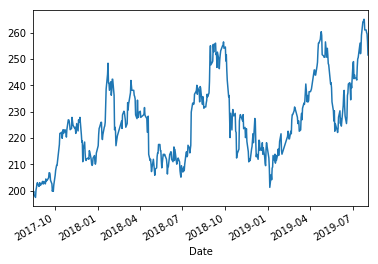

In [32]:
dfs.Close.plot()

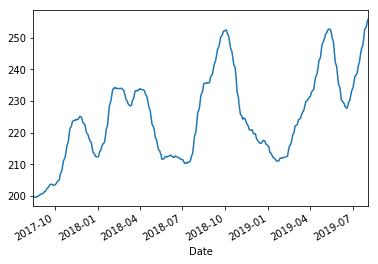

In [35]:
dfs.MA20.plot()

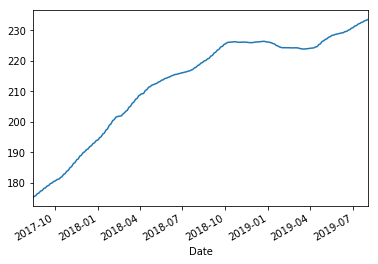

In [36]:
dfs.MA240.plot()

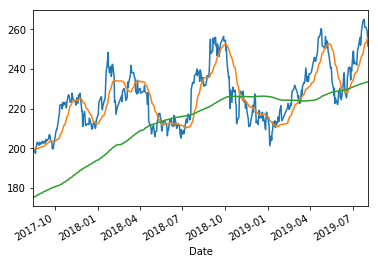

In [37]:
dfs.Close.plot()
dfs.MA20.plot()
dfs.MA240.plot()